In [1]:
!pip install opencv-python
!pip install opencv-python-headless


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def canny_edge_detector(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    blur_image = cv2.GaussianBlur(gray_image, (5, 5), 0)
    canny_image = cv2.Canny(blur_image, 50, 150)
    processed_image_process = cv2.cvtColor(canny_image, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(10, 10))
    plt.imshow(processed_image_process)
    plt.axis('off')
    plt.show()
    return canny_image


### Convert to Grayscale:
**gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)**

**Purpose**: Edge detection is usually performed on a single channel image rather than a multi-channel (color) image. Grayscale conversion simplifies the image and reduces the computational load.

**Function**: cv2.cvtColor converts the input image from the RGB color space to grayscale. The resulting gray_image contains intensity values ranging from 0 to 255.

### Apply Gaussian Blur:

**blur_image = cv2.GaussianBlur(gray_image, (5, 5), 0)**

**Purpose**: Smoothing the image helps in reducing noise and details, which can otherwise lead to spurious edge detection.

**Function**: cv2.GaussianBlur applies a Gaussian kernel to the image. The (5, 5) parameter specifies the size of the kernel, and 0 indicates the standard deviation in the X and Y directions should be calculated based on the kernel size. The resulting blur_image is a smoothed version of the grayscale image.

### Perform Canny Edge Detection:

**canny_image = cv2.Canny(blur_image, 50, 150)**

**Purpose**: The Canny edge detection algorithm identifies edges in the image by looking for areas with a strong gradient in intensity.

**Function**: cv2.Canny applies the Canny edge detector to the blurred image. The two parameters, 50 and 150, are the lower and upper thresholds for the hysteresis procedure. Pixels with gradient values above the upper threshold are considered edges, and those below the lower threshold are non-edges. Pixels with gradient values in between these thresholds are classified based on their connectivity to strong edges.

### Return the Result:

**return canny_image**

**Purpose**: The function returns the canny_image, which is a binary image where the detected edges are marked with white pixels (255), and all other pixels are black (0).

**Summary**:

The canny_edge_detector function processes an input image in three main steps: converting it to grayscale, applying Gaussian blur to reduce noise, and performing Canny edge detection to highlight edges. The result is a binary image that highlights the edges in the original image, which is useful for further processing, such as lane detection.
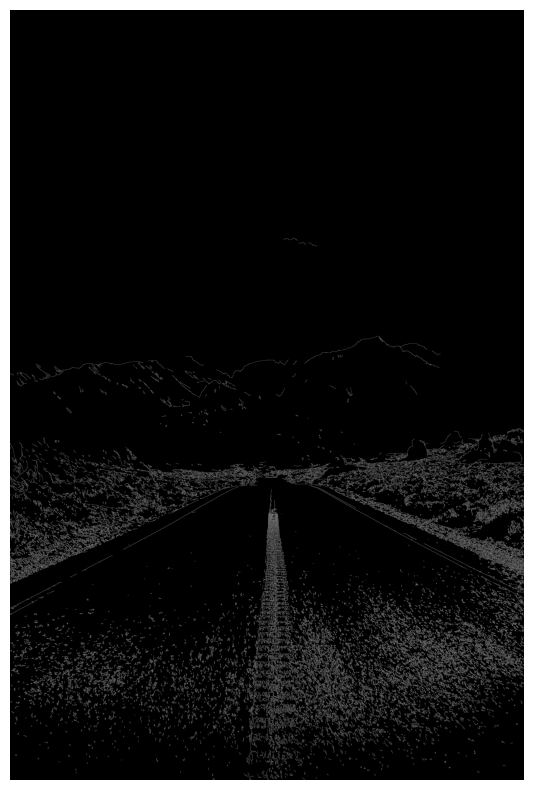

In [4]:
def region_of_interest(image):
    height = image.shape[0]
    print(height)
    row = image.shape[1]
    polygons = np.array([
        [(0, height), (1100, height), (550, 100)]
    ])
    mask = np.zeros_like(image)
    cv2.fillPoly(mask, polygons, 255)
    masked_image = cv2.bitwise_and(image, mask)
     # Convert BGR image to RGB for displaying with matplotlib
    processed_image_rgb = cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(10, 10))
    plt.imshow(processed_image_rgb)
    plt.axis('off')
    plt.show()
    return masked_image


### Determine the Height of the Image:
**height = image.shape[0]**

**Purpose**: Obtain the height of the image, which will be used to define the ROI.

**Function**: image.shape[0] gives the number of rows in the image, i.e., the height.

### Define the Polygon for ROI:

**polygons = np.array([[(200, height), (1100, height), (550, 250)]])**

**Purpose**: Create a polygon that defines the region of interest. This polygon should cover the area where the lanes are expected to be.

**Function**: np.array([...]) creates a NumPy array of the vertices of the polygon. The coordinates [(200, height), (1100, height), (550, 250)] define a triangular region. The points (200, height) and (1100, height) are along the bottom of the image, and (550, 250) is an upper vertex.

### Create a Mask with the Same Dimensions as the Image:

**mask = np.zeros_like(image)**

**Purpose**: Initialize a mask of the same size as the input image but filled with zeros (black).

**Function**: np.zeros_like(image) creates an array of zeros with the same shape and type as the input image. This mask will be used to isolate the region of interest.

### Fill the Polygon on the Mask:

**cv2.fillPoly(mask, polygons, 255)**

**Purpose**: Fill the defined polygon on the mask with white (255) to mark the region of interest.

**Function**: cv2.fillPoly(mask, polygons, 255) fills the specified polygon area in the mask with the value 255 (white). This marks the region of interest in the mask.

### Apply the Mask to the Image:

**masked_image = cv2.bitwise_and(image, mask)**

**Purpose**: Keep only the region of interest in the image by applying the mask.

**Function**: cv2.bitwise_and(image, mask) performs a bitwise AND operation between the input image and the mask. Only the regions where the mask has white pixels (255) will be retained in the output masked_image.

### Return the Masked Image:

**return masked_image**

**Purpose**: Return the processed image that contains only the region of interest.

**Function**: The function returns the masked_image, which highlights only the region of interest while the rest of the image is blacked out.

## Summary:
The region_of_interest function isolates a specific region in the image, which is defined by a polygon. This is useful in scenarios where only a certain part of the image (such as the road in front of a vehicle) is relevant for further processing, such as lane detection. The mask created helps in focusing computational resources on this region, improving the efficiency and accuracy of subsequent image processing steps.

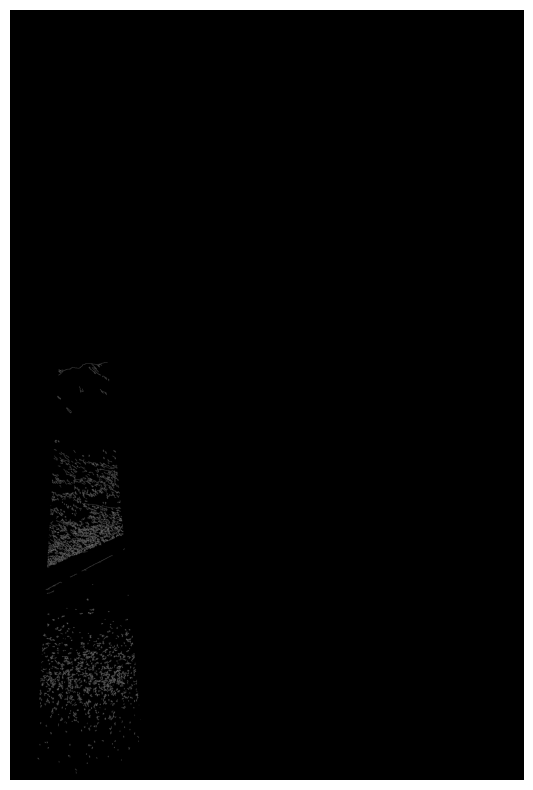

In [5]:
def display_lines(image, lines):
    line_image = np.zeros_like(image)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line.reshape(4)
            cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 10)
    return line_image


### Extract Slope and Intercept:

**slope, intercept = line_parameters**

**Purpose**: Extract the slope and intercept from the input line_parameters.

**Function**: line_parameters is expected to be a tuple or array containing the slope and intercept of a line in the form (slope, intercept).

### Determine the Coordinates for y1:

**y1 = image.shape[0]**

**Purpose**: Set y1 to be the height of the image.

**Function**: image.shape[0] gives the number of rows in the image, i.e., the height. This usually represents the bottom of the image.

### Determine the Coordinates for y2:

 **y2 = int(y1 * (3 / 5))**

**Purpose**: Set y2 to be a point somewhat higher up in the image, typically where we want the line to end.

**Function**: Multiplying y1 by 3/5 gives a value that is 60% of the image height. This is an arbitrary point chosen to represent a reasonable upper limit for the lane line segment.
### Calculate x1 Using the Line Equation:

**x1 = int((y1 - intercept) / slope)**
**Purpose**: Calculate the x-coordinate (x1) for the bottom of the image using the line equation

𝑦
=
𝑚
𝑥
+
𝑏

y=mx+b rearranged to

𝑥
=
(
𝑦
−
𝑏
)
/
𝑚

x=(y−b)/m.

**Function**:
(y1 - intercept) / slope computes the x-coordinate corresponding to y1.
### Calculate x2 Using the Line Equation:

**x2 = int((y2 - intercept) / slope)**
**Purpose**:
Calculate the x-coordinate (x2) for the upper point (y2) using the same line equation rearranged to

𝑥
=
(
𝑦
−
𝑏
)
/
𝑚

x=(y−b)/m.

**Function**: (y2 - intercept) / slope computes the x-coordinate corresponding to y2.

### Return the Coordinates:

return np.array([x1, y1, x2, y2])
Purpose: Return the calculated coordinates as a NumPy array.
Function: np.array([x1, y1, x2, y2]) creates an array containing the coordinates of the line segment endpoints.

## Summary:

The make_coordinates function takes an image and the parameters of a line (slope and intercept) and calculates the coordinates of the endpoints of a line segment. The segment extends from the bottom of the image (y1) to a point higher up (y2). This allows for the visualization of lane lines on the image, extending from the bottom of the image (where the car is) upwards to a specified height, creating a clearer representation of detected lanes.

In [6]:
def make_coordinates(image, line_parameters):
    slope, intercept = line_parameters
    y1 = image.shape[0]
    y2 = int(y1 * (3 / 5))
    x1 = int((y1 - intercept) / slope)
    x2 = int((y2 - intercept) / slope)
    return np.array([x1, y1, x2, y2])

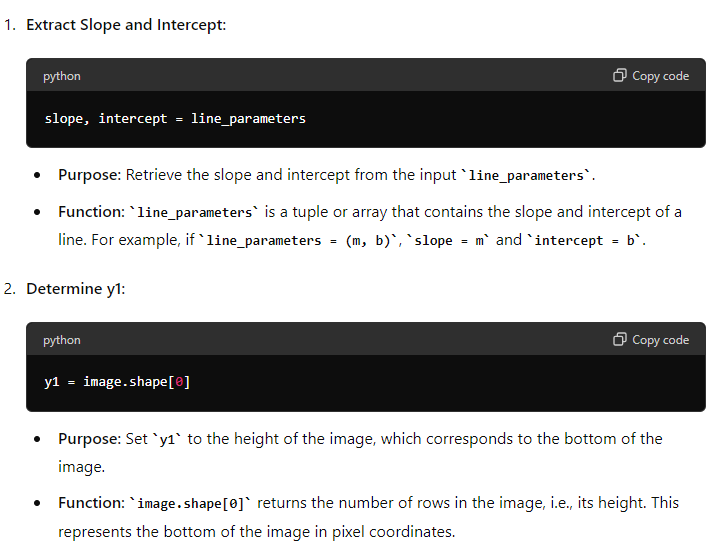
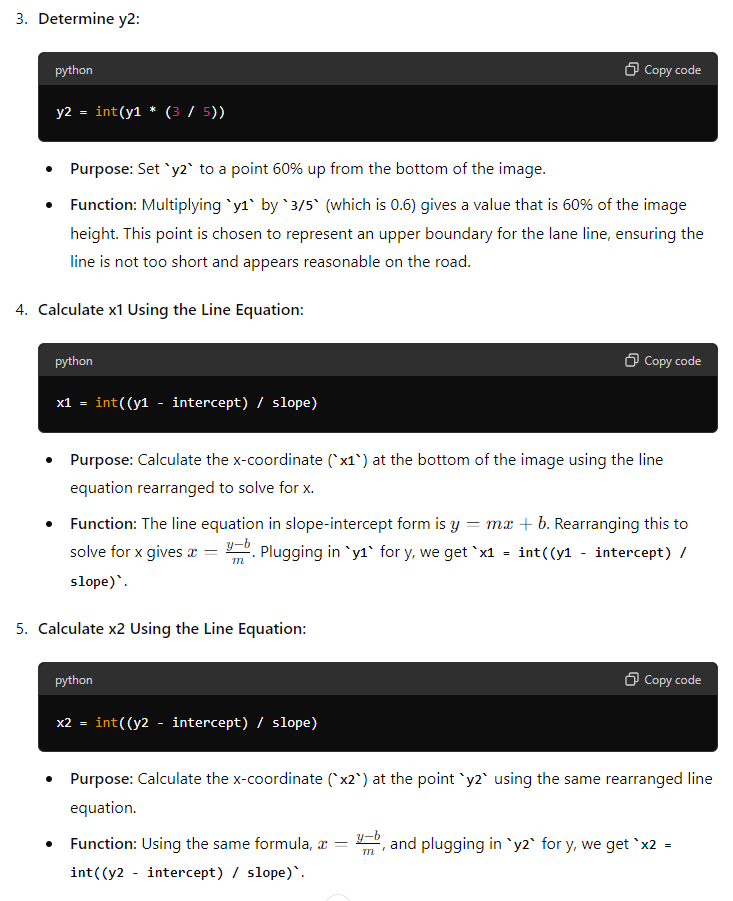
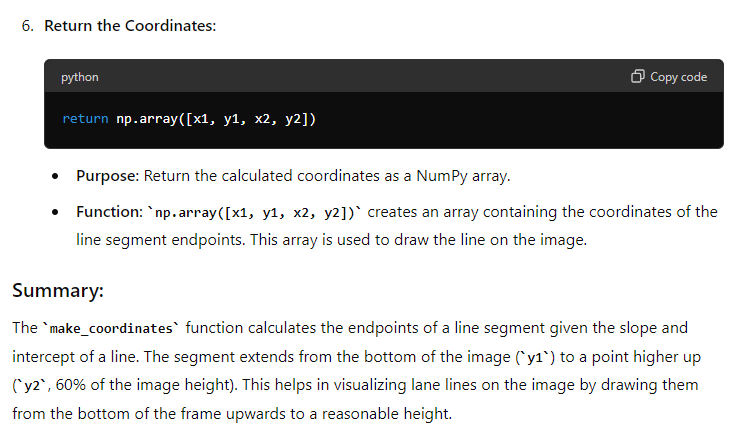

In [7]:
def average_slope_intercept(image, lines):
    left_fit = []
    right_fit = []
    for line in lines:
        x1, y1, x2, y2 = line.reshape(4)
        parameters = np.polyfit((x1, x2), (y1, y2), 1)
        slope = parameters[0]
        intercept = parameters[1]
        if slope < 0:
            left_fit.append((slope, intercept))
        else:
            right_fit.append((slope, intercept))
    left_fit_average = np.average(left_fit, axis=0)
    right_fit_average = np.average(right_fit, axis=0)
    left_line = make_coordinates(image, left_fit_average)
    right_line = make_coordinates(image, right_fit_average)
    return np.array([left_line, right_line])


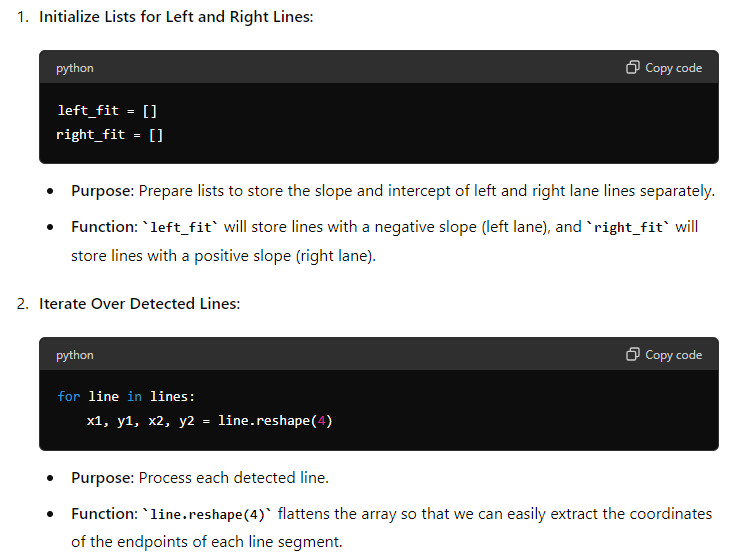
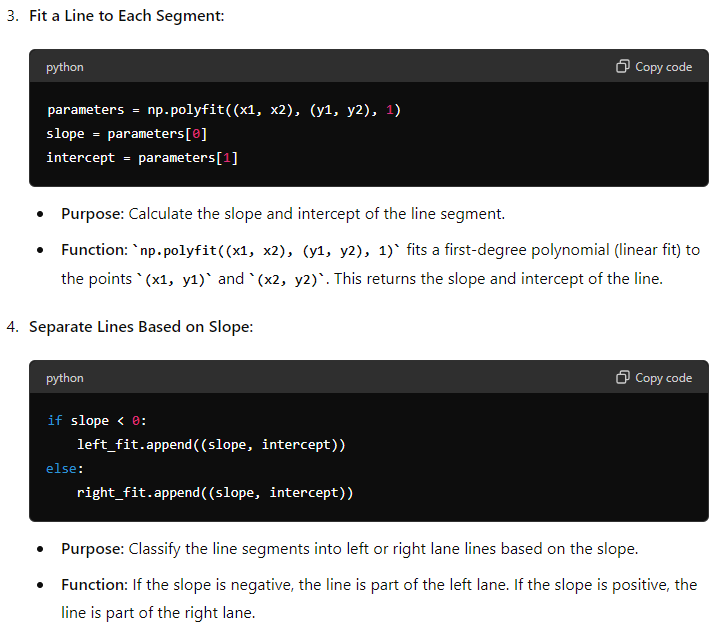
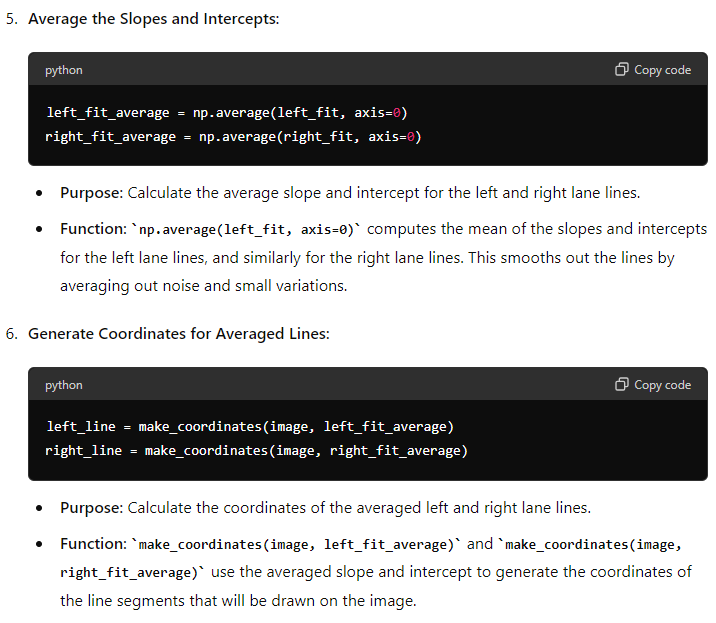
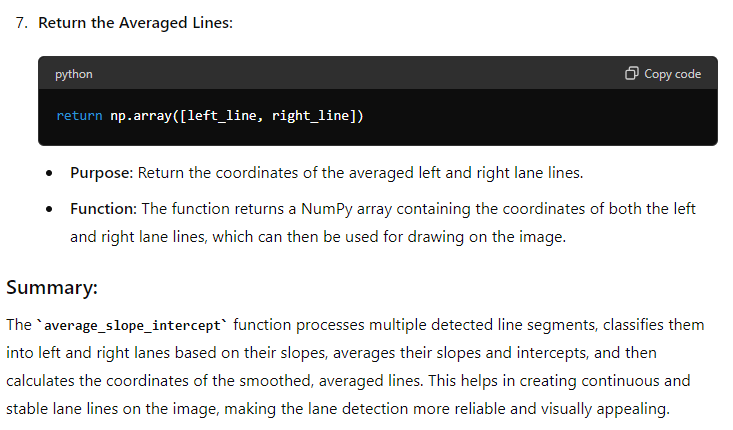

In [8]:
def process_image(image):
    canny_image = canny_edge_detector(image)
    cropped_image = region_of_interest(canny_image)
    lines = cv2.HoughLinesP(cropped_image, 2, np.pi / 180, 100, np.array([]), minLineLength=5, maxLineGap=80)
    print(lines)
    averaged_lines = average_slope_intercept(image, lines)
    line_image = display_lines(image, averaged_lines)
    combo_image = cv2.addWeighted(image, 0.8, line_image, 1, 1)
    return combo_image

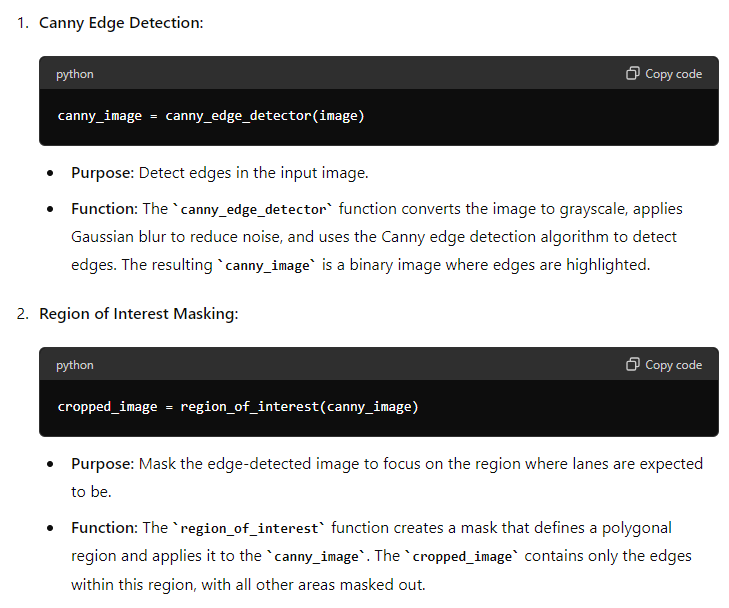
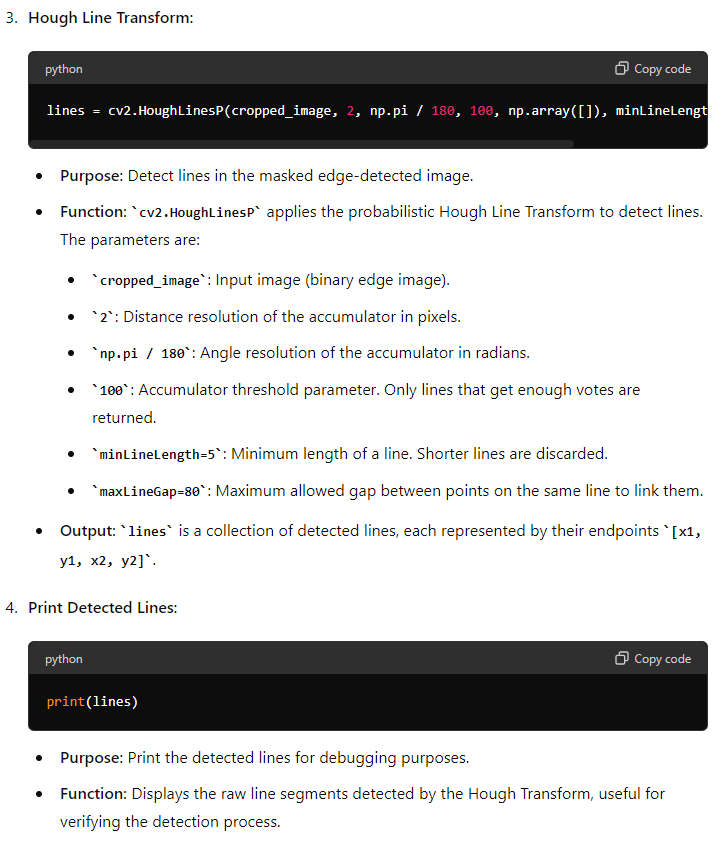
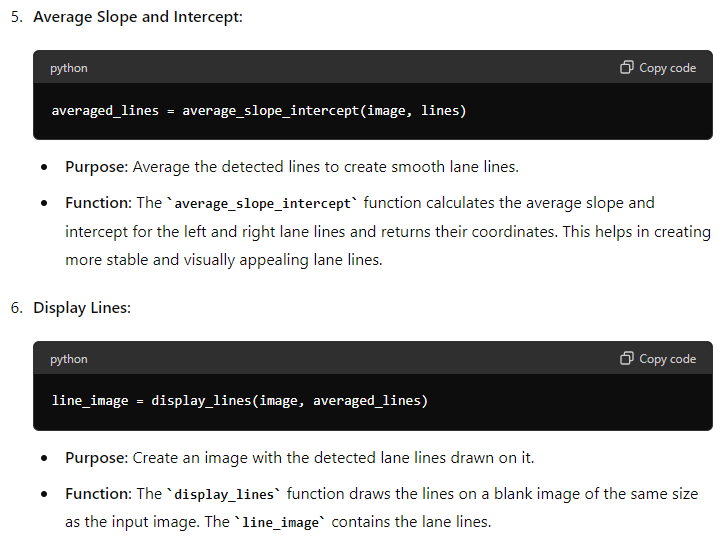
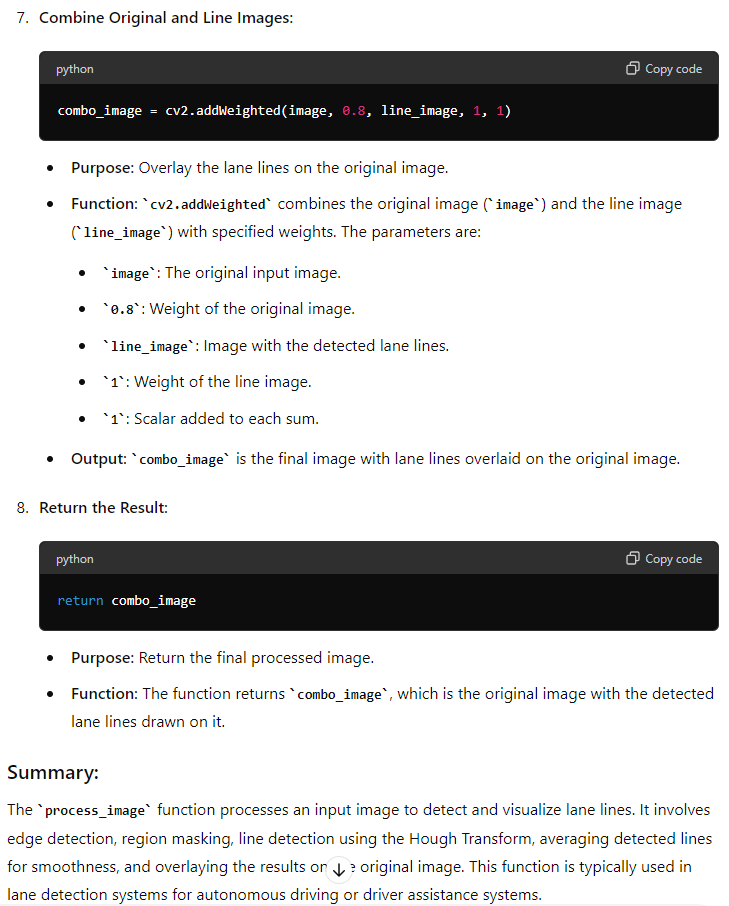

In [9]:
!pip install ipywidgets


FileUpload(value={}, accept='image/*', description='Upload', multiple=True)

Button(description='Process Files', style=ButtonStyle())

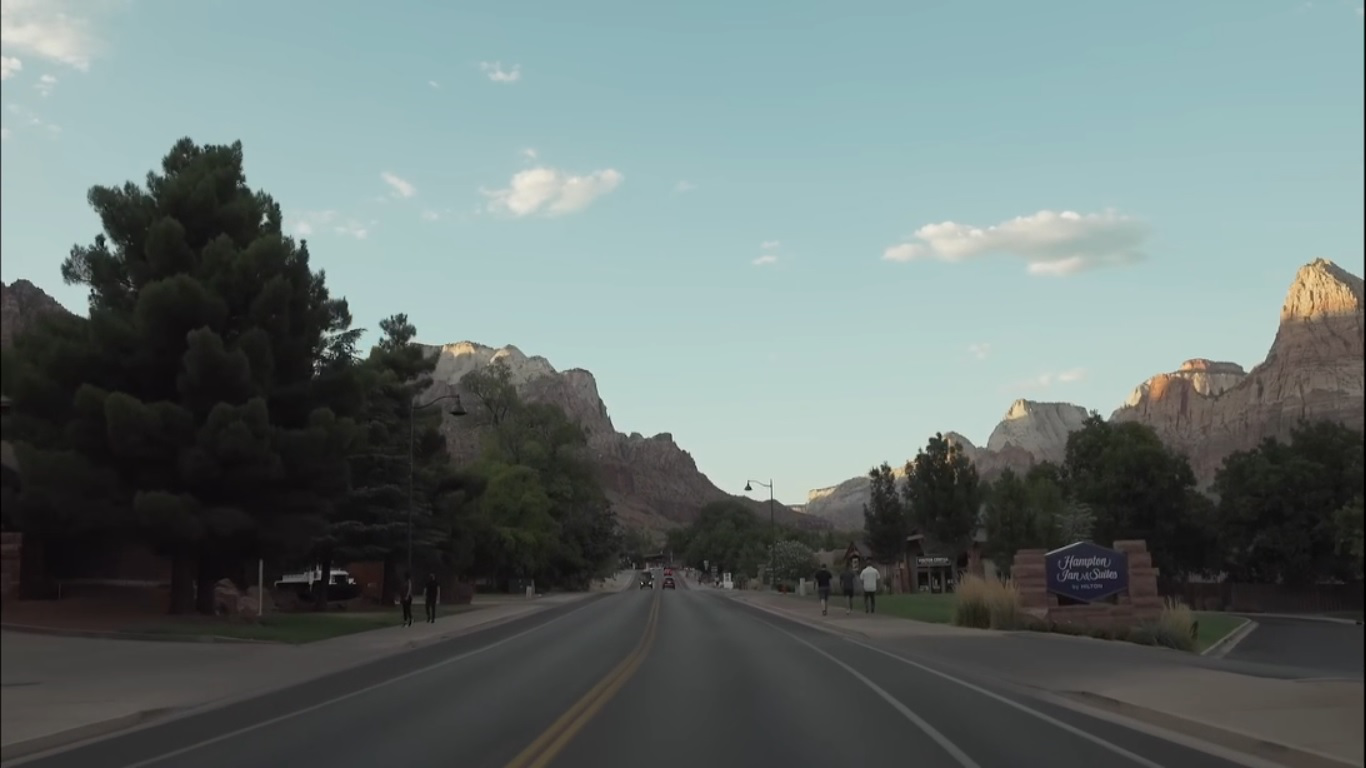

Saved and displayed inputimage.jpg


In [10]:
import ipywidgets as widgets
from IPython.display import display, Image
import PIL.Image
import io

# Create the file upload widget
upload_widget = widgets.FileUpload(accept='image/*', multiple=True)  # accept only image files
display(upload_widget)

# Function to handle the uploaded files
def handle_uploaded_files(uploaded_files):
    uploaded = {}
    for filename, fileinfo in uploaded_files.items():
        img = PIL.Image.open(io.BytesIO(fileinfo['content']))
        uploaded[filename] = img
        display(img)  # Display the image in the notebook
        print(f'Saved and displayed {filename}')
    return uploaded

# Add a button to process the files after they are uploaded
process_button = widgets.Button(description="Process Files")
display(process_button)

# Define the function to be called when the button is clicked
def on_button_clicked(b):
    global uploaded
    uploaded = handle_uploaded_files(upload_widget.value)

# Set the button click event
process_button.on_click(on_button_clicked)



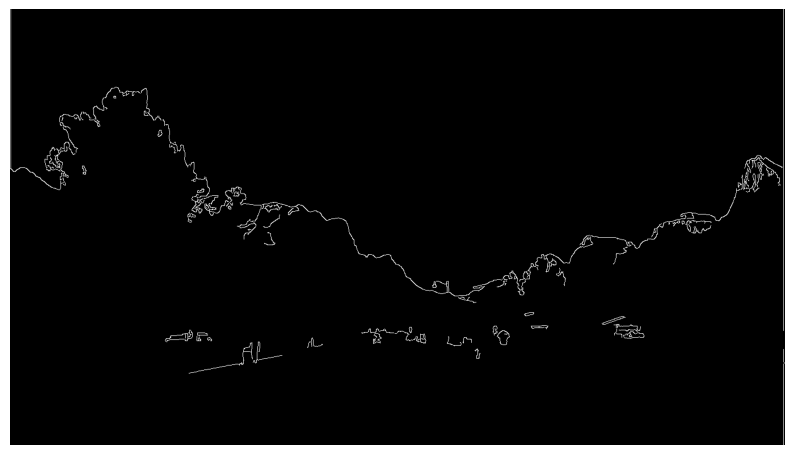

768


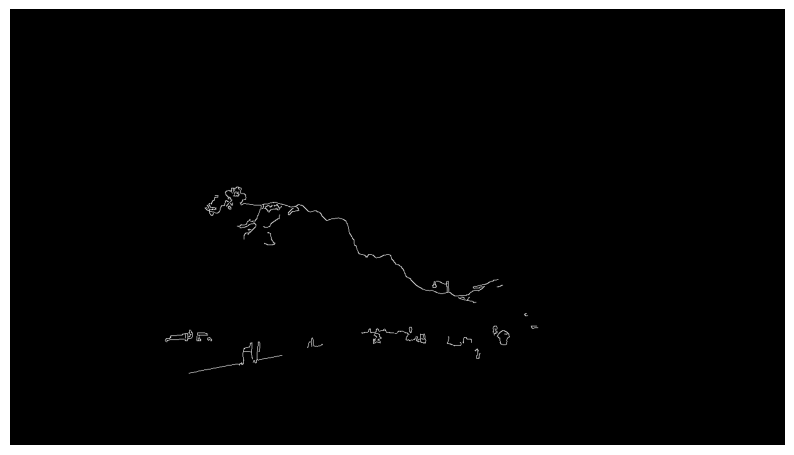

[[[316 641 479 610]]

 [[274 581 355 581]]

 [[350 344 510 344]]]


C:\Users\gaurav\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\gaurav\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


TypeError: cannot unpack non-iterable numpy.float64 object

In [12]:
# Process the uploaded image
file_name = "C:/Users/gaurav/Pictures/inputimage.jpg"
image = cv2.imread(file_name)
processed_image = process_image(image)

# Convert BGR image to RGB for displaying with matplotlib
processed_image_rgb = cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(processed_image_rgb)
plt.axis('off')
plt.show()
    